In [19]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
from scipy import stats as sts
%matplotlib inline

In [20]:
start = dt.datetime(2019,4,1)
end = dt.datetime(2020,3,30)

In [21]:
#Comparing Returns of FAANG for FY19-20
fb = pdr.DataReader("FB", "yahoo", start, end)
aapl = pdr.DataReader("AAPL", "yahoo", start, end)
amzn = pdr.DataReader("AMZN", "yahoo", start, end)
nflx = pdr.DataReader("NFLX", "yahoo", start, end)
goog = pdr.DataReader("GOOGL", "yahoo", start, end)

In [22]:
fb["PerRet"] = ((fb["Close"] - fb["Close"].shift(1)) / fb["Close"] ) * 100
aapl["PerRet"] = ((aapl["Close"] - aapl["Close"].shift(1)) / aapl["Close"] ) * 100
amzn["PerRet"] = ((amzn["Close"] - amzn["Close"].shift(1)) / amzn["Close"] ) * 100
nflx["PerRet"] = ((nflx["Close"] - nflx["Close"].shift(1)) / nflx["Close"] ) * 100
goog["PerRet"] = ((goog["Close"] - goog["Close"].shift(1)) / goog["Close"] ) * 100

In [23]:
data = pd.DataFrame(index=["fb","aapl","amzn","nflx","goog"], columns=["mean","var","stddev","downdev","sharpe","sortino"])

In [24]:
data.loc["fb","mean"] = fb["PerRet"].mean()
data.loc["aapl","mean"] = aapl["PerRet"].mean()
data.loc["amzn","mean"] = amzn["PerRet"].mean()
data.loc["nflx","mean"] = nflx["PerRet"].mean()
data.loc["goog","mean"] = goog["PerRet"].mean()

In [25]:
data.loc["fb","var"] = fb["PerRet"].var()
data.loc["aapl","var"] = aapl["PerRet"].var()
data.loc["amzn","var"] = amzn["PerRet"].var()
data.loc["nflx","var"] = nflx["PerRet"].var()
data.loc["goog","var"] = goog["PerRet"].var()

In [26]:
data.loc["fb","stddev"] = fb["PerRet"].std()
data.loc["aapl","stddev"] = aapl["PerRet"].std()
data.loc["amzn","stddev"] = amzn["PerRet"].std()
data.loc["nflx","stddev"] = nflx["PerRet"].std()
data.loc["goog","stddev"] = goog["PerRet"].std()

In [27]:
#Calculating Downside Deviation
fb["downside"] = [0 if i>0 else i for i in fb["PerRet"]]
aapl["downside"] = [0 if i>0 else i for i in aapl["PerRet"]]
amzn["downside"] = [0 if i>0 else i for i in amzn["PerRet"]]
nflx["downside"] = [0 if i>0 else i for i in nflx["PerRet"]]
goog["downside"] = [0 if i>0 else i for i in goog["PerRet"]]

data.loc["fb","downdev"] = fb["downside"].std()
data.loc["aapl","downdev"] = aapl["downside"].std()
data.loc["amzn","downdev"] = amzn["downside"].std()
data.loc["nflx","downdev"] = nflx["downside"].std()
data.loc["goog","downdev"] = goog["downside"].std()

In [28]:
#Calculating Sharpe Ratio
#Assuming risk-free rate = 0.19%
data.loc["fb","sharpe"] = (data.loc["fb","mean"] - 0.19) / data.loc["fb","stddev"] 
data.loc["aapl","sharpe"] = (data.loc["aapl","mean"] - 0.19) / data.loc["aapl","stddev"]
data.loc["amzn","sharpe"] = (data.loc["amzn","mean"] - 0.19) / data.loc["amzn","stddev"]
data.loc["nflx","sharpe"] = (data.loc["nflx","mean"] - 0.19) / data.loc["nflx","stddev"]
data.loc["goog","sharpe"] = (data.loc["goog","mean"] - 0.19) / data.loc["goog","stddev"]

In [29]:
#Calculating sortino Ratio
#Assuming risk-free rate = 0.19%
data.loc["fb","sortino"] = (data.loc["fb","mean"] - 0.19) / data.loc["fb","downdev"] 
data.loc["aapl","sortino"] = (data.loc["aapl","mean"] - 0.19) / data.loc["aapl","downdev"]
data.loc["amzn","sortino"] = (data.loc["amzn","mean"] - 0.19) / data.loc["amzn","downdev"]
data.loc["nflx","sortino"] = (data.loc["nflx","mean"] - 0.19) / data.loc["nflx","downdev"]
data.loc["goog","sortino"] = (data.loc["goog","mean"] - 0.19) / data.loc["goog","downdev"]

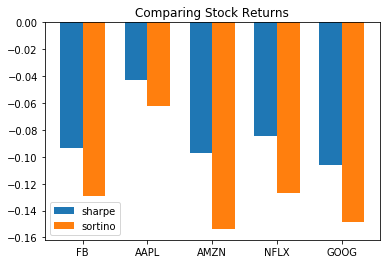

In [30]:
#Analysing Sharpe and Sortino to conclude best-performing stock
ind = np.arange(5)
width = 0.35
plt.bar(ind, data["sharpe"], width, label="sharpe")
plt.bar(ind+width, data["sortino"], width, label="sortino")
plt.title("Comparing Stock Returns")
plt.xticks(ind+width/2, ("FB", "AAPL", "AMZN", "NFLX", "GOOG"))
plt.legend(loc="best")
plt.show()

In [ ]:
#Hence comparatively best performed stock is AAPL